In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline



In [6]:
df = pd.read_csv('Data of Car Features and MSRP.csv') 
df.sample(5)

,Car company name,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3283,Cadillac,CTS,2017,premium unleaded (required),420.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Factory Tuner,Luxury,High-Performance",Large,Sedan,24,16,1624,60695
7092,Ford,Mustang,2017,premium unleaded (recommended),310.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Midsize,Convertible,27,21,5657,35145
7008,Toyota,MR2 Spyder,2003,premium unleaded (required),138.0,4.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,30,22,2031,25645
2698,Acura,CL,2002,premium unleaded (required),225.0,6.0,AUTOMATIC,front wheel drive,2.0,Luxury,Midsize,Coupe,27,17,204,28030
10801,Mazda,Tribute,2009,regular unleaded,171.0,4.0,MANUAL,front wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,586,19730


In [7]:
print(df.shape) 


(11914, 16)


In [8]:
print(df['Car company name'].value_counts())

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Genesis   

In [9]:
new_df = df[df['Car company name']=='Volkswagen']

In [10]:
print(new_df.shape) 
print(new_df.isnull().sum())

(809, 16)
Car company name       0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64


In [11]:
new_df = new_df.dropna()

In [12]:
print(new_df.shape) 
print(new_df.isnull().sum())

(581, 16)
Car company name     0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [13]:
new_df.sample(7)

,Car company name,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5415,Volkswagen,Golf R,2015,premium unleaded (recommended),292.0,4.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Hatchback,Factory Tuner,High-Performance",Compact,4dr Hatchback,30,23,873,36595
1864,Volkswagen,Beetle Convertible,2016,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Performance,Compact,Convertible,31,23,873,32670
5443,Volkswagen,Golf,2015,diesel,150.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,"Hatchback,Diesel",Compact,4dr Hatchback,43,31,873,26995
5638,Volkswagen,GTI,2013,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,33,24,873,30795
5659,Volkswagen,GTI,2013,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,31,21,873,30995
5409,Volkswagen,Golf GTI,2017,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,32,24,873,26695
7996,Volkswagen,Rabbit,2007,regular unleaded,150.0,5.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,28,19,873,18185


In [14]:
new_df = new_df[['Engine HP','MSRP']]

In [15]:
new_df.sample(5)

,Engine HP,MSRP
1930,210.0,25995
5646,200.0,25095
6036,210.0,25635
1915,170.0,21795
2395,200.0,32995


In [16]:
X = np.array(new_df[['Engine HP']]) 
y = np.array(new_df[['MSRP']])

In [17]:
print(X.shape) 
print(y.shape)

(581, 1)
(581, 1)


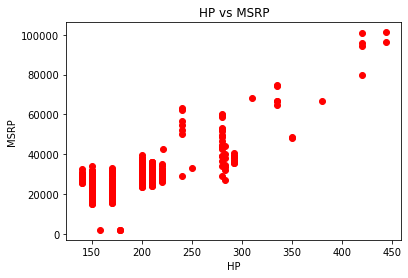

In [18]:
plt.scatter(X,y,color="red") 
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) 

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

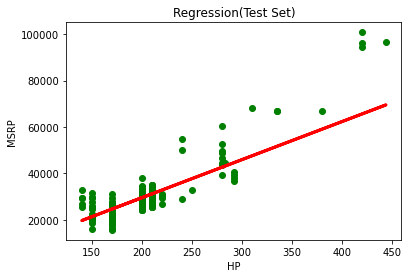

In [22]:
plt.scatter(X_test,y_test,color="green") 
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

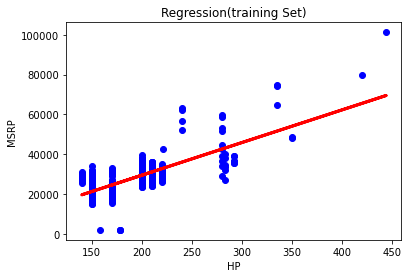

In [23]:
plt.scatter(X_train,y_train,color="blue")  
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [24]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) 
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) 

R2 score: 0.73
Mean squared Error : 55796476.51179164


In [25]:
def car_price(hp): 
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])
car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Prce will be : ',int(car_price(car_hp))*69,'₹')

Enter Volkswagen cars Horse Power : 210
This Volkswagen Prce will be :  2146314 ₹
